# 第1章「データマイニングとは」

ここで使うパッケージをインストールしておく：
- [CSV](https://juliapackages.com/p/csv)
- [DataFrames](https://juliapackages.com/p/dataframes)
  - Python の panda のようなもの
- [RCall](https://juliapackages.com/p/rcall)
  - RCall のビルドについては [こちらのツイート](https://twitter.com/kabukauna/status/1339496847686057985) を参考に。

In [1]:
# 必要なパッケージのインストール
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("RCall")
ENV["R_HOME"]="*"
Pkg.build("RCall")
Pkg.add("Gadfly")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
    Building Conda → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/6e47d11ea2776bc5627421d59cdcc1296c058071/build.log`
    Building RCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/72fddd643785ec1f36581cbc3d288529b96e99a7/build.log`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
# パッケージ使用宣言
using CSV
using DataFrames
using RCall
using Gadfly

## データの入出力

Julia で CSV ファイルの読み書きをする。[JuliaでCSVファイルを読み込む3つの方法-Julia1.7対応-](https://programing.style/archives/524)を参考に設定する。

In [16]:
# CSV.read()で読み込む
rikujou1 = CSV.read("data/chap1/陸上データ.csv", DataFrame)

,高跳び,100m走,走り幅跳び,開催年,区分
,Float64,Float64,Float64,Int64,String7
1,1.81,12.0,6.35,1896,戦前
2,1.9,11.0,7.185,1900,戦前
3,1.8,11.0,7.34,1904,戦前
4,1.9,10.8,7.48,1908,戦前
5,1.93,10.8,7.6,1912,戦前
6,1.936,10.6,7.15,1920,戦前
7,2.12,10.5,7.83,1956,戦後
8,2.18,10.0,8.03,1964,戦後
9,2.38,9.92,8.72,1988,戦後


あるいは、以下のような書き方でも OK:

In [17]:
# CSV.File()で読み込む
rikujou2 = DataFrame(CSV.File("data/chap1/陸上データ.csv"))

,高跳び,100m走,走り幅跳び,開催年,区分
,Float64,Float64,Float64,Int64,String7
1,1.81,12.0,6.35,1896,戦前
2,1.9,11.0,7.185,1900,戦前
3,1.8,11.0,7.34,1904,戦前
4,1.9,10.8,7.48,1908,戦前
5,1.93,10.8,7.6,1912,戦前
6,1.936,10.6,7.15,1920,戦前
7,2.12,10.5,7.83,1956,戦後
8,2.18,10.0,8.03,1964,戦後
9,2.38,9.92,8.72,1988,戦後


In [5]:
# パイプライン演算子を使う
rikujou3 =  CSV.File("data/chap1/陸上データ.csv") |> DataFrame

,高跳び,100m走,走り幅跳び,開催年,区分
,Float64,Float64,Float64,Int64,String7
1,1.81,12.0,6.35,1896,戦前
2,1.9,11.0,7.185,1900,戦前
3,1.8,11.0,7.34,1904,戦前
4,1.9,10.8,7.48,1908,戦前
5,1.93,10.8,7.6,1912,戦前
6,1.936,10.6,7.15,1920,戦前
7,2.12,10.5,7.83,1956,戦後
8,2.18,10.0,8.03,1964,戦後
9,2.38,9.92,8.72,1988,戦後


既に出力結果にも現れているが、`CSV.read()` で読まれたオブジェクトは**データフレーム**と呼ばれる。データフレームとは、外部データに含まれる変数の種類が認識されたデータセットのこと。

In [6]:
print(rikujou1)

12×5 DataFrame
 Row │ 高跳び   100m走   走り幅跳び  開催年  区分    
     │ Float64  Float64  Float64     Int64   String7 
─────┼───────────────────────────────────────────────
   1 │   1.81     12.0        6.35     1896  戦前
   2 │   1.9      11.0        7.185    1900  戦前
   3 │   1.8      11.0        7.34     1904  戦前
   4 │   1.9      10.8        7.48     1908  戦前
   5 │   1.93     10.8        7.6      1912  戦前
   6 │   1.936    10.6        7.15     1920  戦前
   7 │   2.12     10.5        7.83     1956  戦後
   8 │   2.18     10.0        8.03     1964  戦後
   9 │   2.38      9.92       8.72     1988  戦後
  10 │   2.34      9.96       8.67     1992  戦後
  11 │   2.39      9.84       8.5      1996  戦後
  12 │   2.36      9.85       8.31     2004  戦後

CSV ファイルの追加・更新は [JuliaでCSVを作成・更新してみた](https://qiita.com/yokotate/items/e8f0777250f24b972eb7)を参照

## 基礎統計量とグラフィックス

`describe()` で要約統計量を出力。

In [7]:
describe(rikujou1)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,高跳び,2.08717,1.8,2.028,2.39,0,Float64
2,100m走,10.5225,9.84,10.55,12.0,0,Float64
3,走り幅跳び,7.76375,6.35,7.715,8.72,0,Float64
4,開催年,1945.0,1896,1938.0,2004,0,Int64
5,区分,,戦前,,戦後,0,String7


R の `summary()` を使うことで、より情報多めな要約統計量を出力：
```
(@v1.7) pkg> add RCall
```

In [8]:
R"summary($rikujou1)"

RObject{StrSxp}
     高跳び          100m走        走り幅跳び        開催年    
 Min.   :1.800   Min.   : 9.84   Min.   :6.350   Min.   :1896  
 1st Qu.:1.900   1st Qu.: 9.95   1st Qu.:7.301   1st Qu.:1907  
 Median :2.028   Median :10.55   Median :7.715   Median :1938  
 Mean   :2.087   Mean   :10.52   Mean   :7.764   Mean   :1945  
 3rd Qu.:2.345   3rd Qu.:10.85   3rd Qu.:8.357   3rd Qu.:1989  
 Max.   :2.390   Max.   :12.00   Max.   :8.720   Max.   :2004  
     区分          
 Length:12         
 Class :character  
 Mode  :character  
                   
                   
                   


R の関数 `by()` を用いて、それぞれの区分ごとの各種目の平均を算出する：

In [9]:
R"by($rikujou1, $rikujou1$区分,summary)"

RObject{VecSxp}
`#JL`$rikujou1$区分: 戦後
     高跳び          100m走         走り幅跳び        開催年    
 Min.   :2.120   Min.   : 9.840   Min.   :7.830   Min.   :1956  
 1st Qu.:2.220   1st Qu.: 9.867   1st Qu.:8.100   1st Qu.:1970  
 Median :2.350   Median : 9.940   Median :8.405   Median :1990  
 Mean   :2.295   Mean   :10.012   Mean   :8.343   Mean   :1983  
 3rd Qu.:2.375   3rd Qu.: 9.990   3rd Qu.:8.627   3rd Qu.:1995  
 Max.   :2.390   Max.   :10.500   Max.   :8.720   Max.   :2004  
     区分          
 Length:6          
 Class :character  
 Mode  :character  
                   
                   
                   
------------------------------------------------------------ 
`#JL`$rikujou1$区分: 戦前
     高跳び          100m走        走り幅跳び        開催年    
 Min.   :1.800   Min.   :10.60   Min.   :6.350   Min.   :1896  
 1st Qu.:1.833   1st Qu.:10.80   1st Qu.:7.159   1st Qu.:1901  
 Median :1.900   Median :10.90   Median :7.263   Median :1906  
 Mean   :1.879   Mean   :11.03   Mean   :7.184   Mean

散布図とヒストグラムの描画：

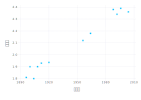

In [18]:
plot(rikujou1, x="開催年", y="高跳び",Geom.point)

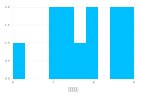

In [27]:
plot(rikujou1,　x="走り幅跳び", Geom.histogram(limits=(min=6, max=9)))

Rを使って描いてみる：

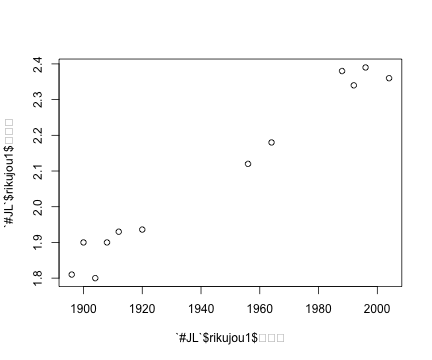

RObject{NilSxp}
NULL


In [20]:
R"plot($rikujou1$開催年, $rikujou1$高跳び)"

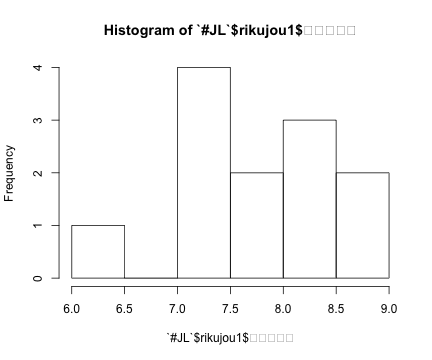

RObject{VecSxp}
$breaks
[1] 6.0 6.5 7.0 7.5 8.0 8.5 9.0

$counts
[1] 1 0 4 2 3 2

$density
[1] 0.1666667 0.0000000 0.6666667 0.3333333 0.5000000 0.3333333

$mids
[1] 6.25 6.75 7.25 7.75 8.25 8.75

$xname
[1] "`#JL`$rikujou1$走り幅跳び"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [11]:
R"hist($rikujou1$走り幅跳び)"